<a href="https://colab.research.google.com/github/hkaragah/google_colab_repo/blob/main/hands_on_ml_exercises/05_LinearSVC_SVC_SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Classification using LinearSVC, SVC, and SGDClassifier

__Disclaimer:__ This exercise is adopted from `"Hands-on Machine Learning with Scikit-Learn, Keras & Tensorflow (Third Edition)"` book written by `_Aurelien Geron_` publoshed by `_O'Reilly_`. I broke them down into smaller digestable snippets, made some modifications, and added some explanations so that I can undersatand them better. The porpuse of this notebook is just for me to understand the concept and have hands-on practice while reading the book material.

## Object
Compare Support Vector Machines (SVM) linear classifiers with SGDClassifier

## Load Data

In this notebook, I'll use the scikit learn __breast cancer dataset__ to compare linear classifiers performance. Let's load the required libraries and also the __breast cancer dataset__.

In [83]:
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from copy import deepcopy

In [2]:
bc_data = load_breast_cancer(as_frame=True)
type(bc_data)

sklearn.utils._bunch.Bunch

__Bunch__ is a special datatype contains multiple pandas dataframes. Let's inspect the dataframes inside `iris`.

## Inspect Data

In [3]:
bc_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# Description of dataset
print(bc_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Here, is the first 5 rows of the features. According to the above description, there are 30 features in total.

In [14]:
data = pd.DataFrame()
data = bc_data.data.copy(deep=True)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

The `data` dataframe contains 30 features as shown in the table above. There are a total of 569 samples with numeric (float64) values and with no _null_ value. Let's check the `target` dataseries.

In [11]:
target = bc_data.target
target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [12]:
target.value_counts()

,count
target,
1,357
0,212


In [13]:
bc_data.target_names

array(['malignant', 'benign'], dtype='<U9')

According to the description, the `bc_data.target` has a total of 569 (357+212) entries. There are two classes in the dataseries (binary), 0 and 1 which are corresponding to 'malignant' and 'benign'.

- 1 -> benign (357)
- 0 -> malignant (212)


In [13]:
# Adding "target" to "data" dtaframe
data['target'] = target

# Compute correlation matrix
corr_matrix = data.corr()
corr_with_target = corr_matrix['target'].drop('target')
corr_with_target.sort_values(ascending=True)

,target
worst concave points,-0.793566
worst perimeter,-0.782914
mean concave points,-0.776614
worst radius,-0.776454
mean perimeter,-0.742636
worst area,-0.733825
mean radius,-0.730029
mean area,-0.708984
mean concavity,-0.696360
worst concavity,-0.659610


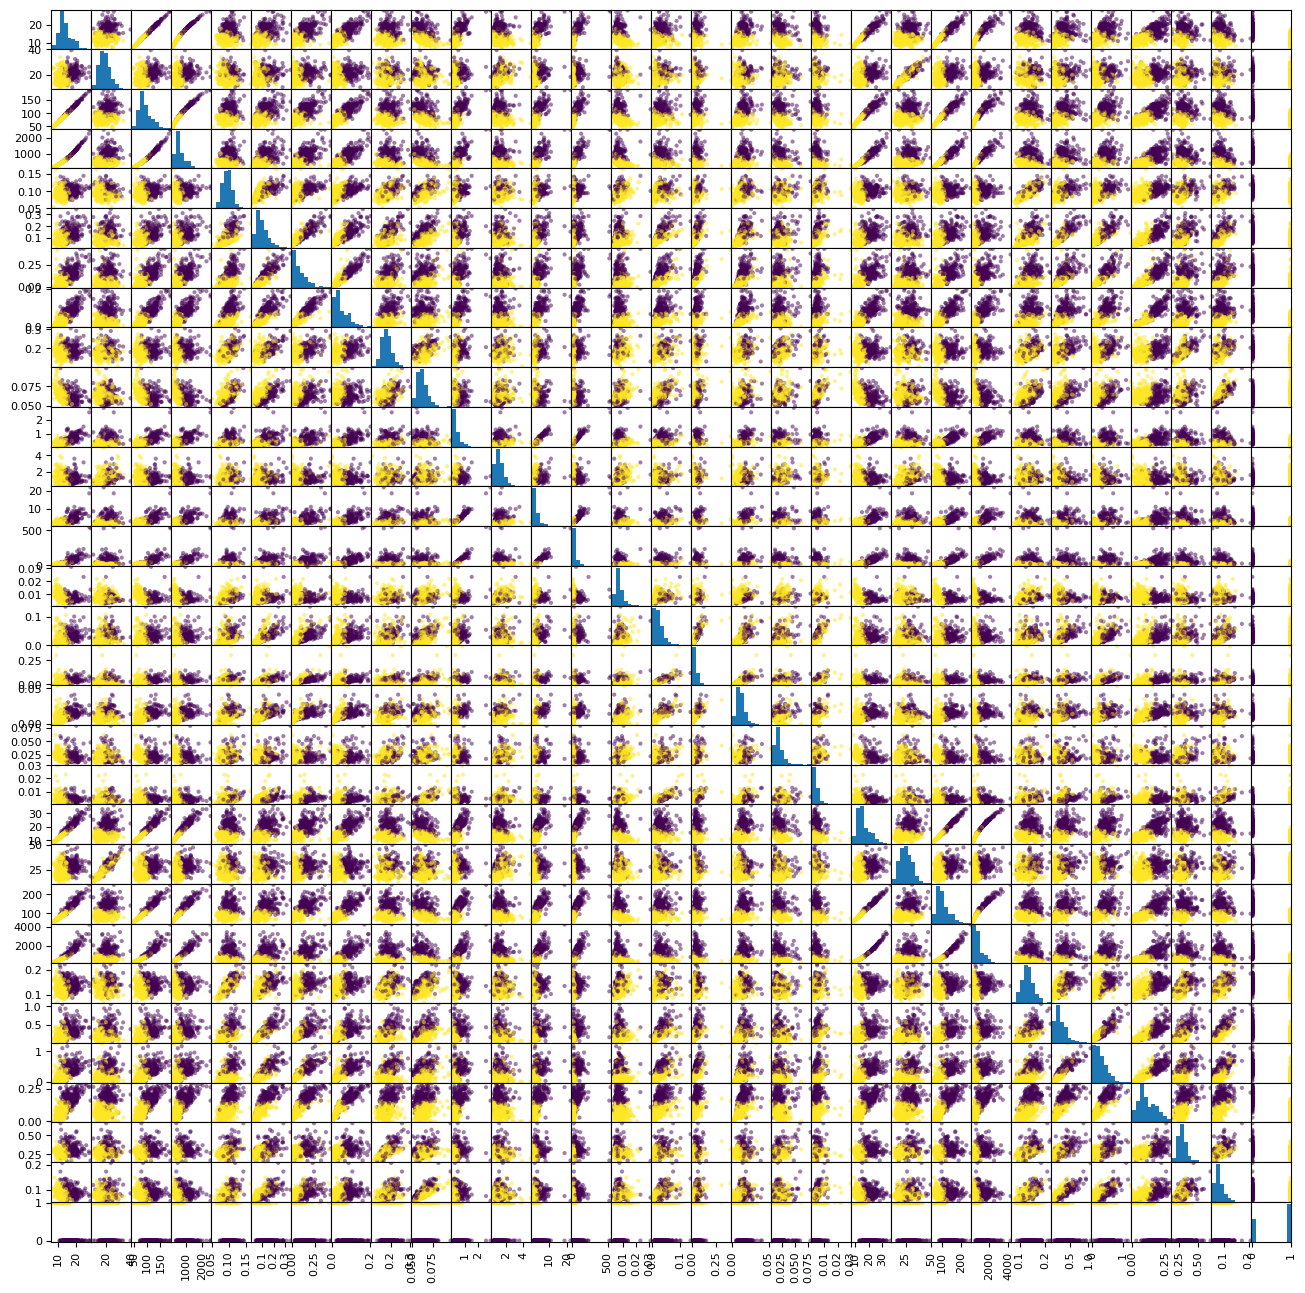

In [41]:
from pandas.plotting import scatter_matrix

scatter_matrix = scatter_matrix(data, c=target, figsize=(16, 16))
for ax in scatter_matrix.flatten():
    ax.set_xlabel('')
    ax.set_ylabel('')
plt.show()

## Mathod 2: Feature Importance Analysis
There are multiple approaches for feature importance analysis.

* __Lasso Regression:__
Lasso Regression (L1 regularization) provides feature importance by shrinking some coefficients to zero, effectively performing feature selection.

* __Random Forest Classifier:__
Random Forests provide feature importance scores based on how much each feature improves the model's performance.

* __Gradient Boosting:__
Gradient Boosting models can also provide feature importance scores.

__Note:__ All the data must be stored in a Pandas DataFrame format for plotting porpuses.

In [50]:
#Lasso Regresion
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(data, target)
lasso_df = pd.DataFrame({'Feature': data.columns, 'Importance': np.abs(lasso.coef_)}).sort_values(by='Importance', ascending=False)

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(data, target)
rf_df = pd.DataFrame({'Feature': data.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(data, target)
gbc_df = pd.DataFrame({'Feature': data.columns, 'Importance': model.feature_importances_}).sort_values(by='Importance', ascending=False)

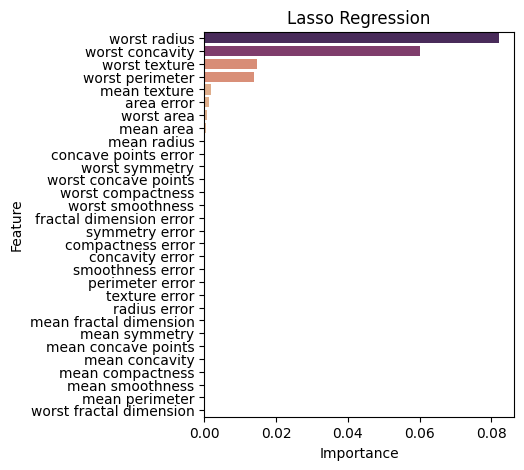

In [56]:
import seaborn as sns
plt.figure(figsize=(4, 5))
sns.barplot(x='Importance', y='Feature', data=lasso_df, palette='flare', hue='Importance', legend=False)
plt.title('Lasso Regression')
plt.show()

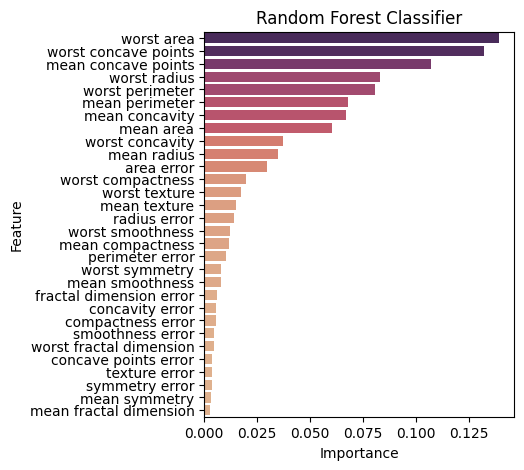

In [57]:
plt.figure(figsize=(4, 5))
sns.barplot(x='Importance', y='Feature', data=rf_df, palette='flare', hue='Importance', legend=False)
plt.title('Random Forest Classifier')
plt.show()

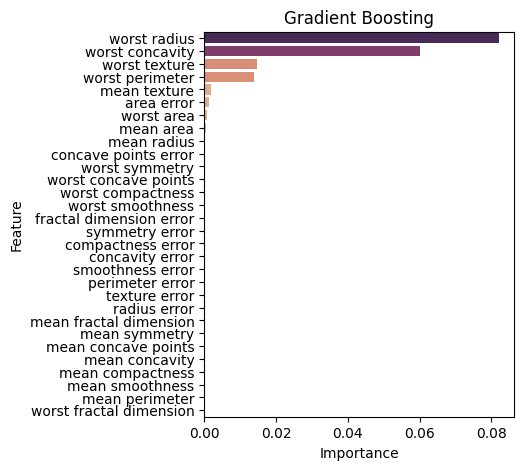

In [58]:
plt.figure(figsize=(4, 5))
sns.barplot(x='Importance', y='Feature', data=lasso_df, palette='flare', hue='Importance', legend=False)
plt.title('Gradient Boosting')
plt.show()

According to _Lasso Regression_ and _Gradient Boosting_, `worst_radius` and `worst_concavity` are the two top important features. They are ranked 4th and 9th respective per _Random Forest Classifier_. This method shows `worst_area` and `worst_concave_point` are the top two most important features.<br>
Let's plot the data point to getter a better sense of their distribution.

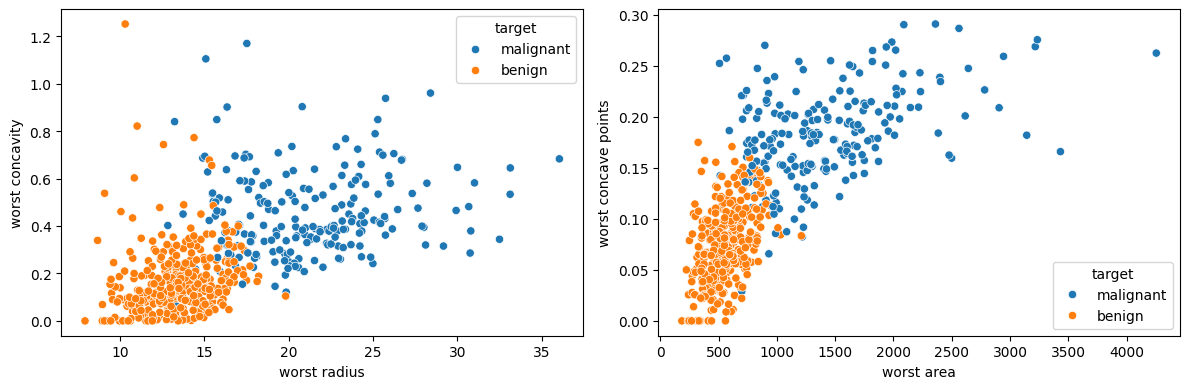

In [80]:
df1 = data[['worst radius', 'worst concavity']]
df2 = data[['worst area', 'worst concave points']]

sns.reset_defaults()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.scatterplot(data=df1, x='worst radius', y='worst concavity', hue=target.map({0: 'malignant', 1: 'benign'}), ax=axes[0])
sns.scatterplot(data=df2, x='worst area', y='worst concave points', hue=target.map({0: 'malignant', 1: 'benign'}), ax=axes[1])

plt.tight_layout()
plt.show()

## Create training set

I create two datasets:

* `worst_radius` and `worst_concavity` dataset
* `worst_area` and `worst_concave_point` dataset

In [81]:
# Creat feature and target sets
X1 = data[['worst radius', 'worst concavity']].values # converts pandas.DataFram to numpy.ndarray
X2 = data[['worst area', 'worst concave points']].values
y = target

In [131]:
X1[:,1].min()

0.0

In [92]:
print(type(X1), X1.shape)
print(type(y), y.shape)

<class 'numpy.ndarray'> (569, 2)
<class 'pandas.core.series.Series'> (569,)


It seems a linear classifier can be used in this case.

## LinearSVC
We use `LinearSVC` classifier from sklearn library. We create two model here, each with diferent hyperparameter `C`, which is a parameter that regularize the model. The higher the `C`, the narrower are the margins (__hard margin classification__) and the higher the chance of overfitting. Reducing the `C` moves the margins farther from each other (__soft margin classification__) and increases the chance of underfitting.

In [210]:
lsvc = make_pipeline(
    StandardScaler(),
    LinearSVC(penalty='l2', C=1, max_iter=10_000, dual=True, random_state=42))

svc = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=0.008, random_state=42))

sgd = make_pipeline(
    StandardScaler(),
    SGDClassifier(alpha=0.25, random_state=42))

In [211]:
x1_clfs = [deepcopy(lsvc), deepcopy(svc), deepcopy(sgd)]
x2_clfs = [deepcopy(lsvc), deepcopy(svc), deepcopy(sgd)]

for clf in x1_clfs:
    clf.fit(X1, y)

for clf in x2_clfs:
    clf.fit(X2, y)

clfs = [x1_clfs, x2_clfs]

In [193]:
def plot_datapoints(X, y, ax):
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y.map({0: 'malignant', 1: 'benign'}), ax=ax)

def get_unscaled_params(svm_clf):
    scaler = svm_clf.named_steps['standardscaler']
    classifier= svm_clf.steps[1][1] # another way to access classifier is to use .steps with indices

    # Scaled coefficients and intercept
    w_s = classifier.coef_[0]
    b_s = classifier.intercept_[0]

    # Unscaled coefficients and intercept
    w = w_s / scaler.scale_
    b = classifier.decision_function([-scaler.mean_ / scaler.scale_])

    return w, b

def plot_linearsvc_decision_boundary(X, ax, clf, scaled=True)            :
    x0 = np.linspace(X[:, 0].min() - 0.2, X[:, 0].max() + 0.2, 200)
    if scaled:
        x1 = clfs[0][1].steps[1][1].decision_function(np.c_[x0, np.zeros_like(x0)])
    else:
        w, b = get_unscaled_params(clfs[0][1])
        x1 = -(w[0] / w[1]) * x0 - b / w[1]

    sns.lineplot(x=x0, y=x1, ax=ax, color='k', linewidth=2, zorder=-2)
    ax.set_title(f"{clf.steps[1][0]}, w: [{clf.steps[1][1].coef_[0][1]:.2f},{clf.steps[1][1].coef_[0][1]:.2f}], b:{clf.steps[1][1].intercept_[0]:.2f}", fontsize=12)


def plot_svc_decision_boundary(X, ax, clf, scaled=True):
    x0 = np.linspace(X[:, 0].min() - 0.2, X[:, 0].max() + 0.2, 200)
    if scaled:
        x1 = clf.steps[1][1].decision_function(np.c_[x0, np.zeros_like(x0)])
    else:
        w, b = get_unscaled_params(clf)
        x1 = -(w[0] / w[1]) * x0 - b / w[1]
    sns.lineplot(x=x0, y=x1, ax=ax, color='k', linewidth=2, zorder=-2)
    ax.set_title(f"{clf.steps[1][0]}, w: [{clf.steps[1][1].coef_[0][1]:.2f},{clf.steps[1][1].coef_[0][1]:.2f}], b:{clf.steps[1][1].intercept_[0]:.2f}", fontsize=12)


def plot_sgd_decision_boundary(X, ax, clf):
    x0 = np.linspace(X[:, 0].min() - 0.2, X[:, 0].max() + 0.2, 200)
    x1 = clf.steps[1][1].decision_function(np.c_[x0, np.zeros_like(x0)])
    sns.lineplot(x=x0, y=x1, ax=ax, color='k', linewidth=2, zorder=-2)
    ax.set_title(f"{clf.steps[1][0]}, w: [{clf.steps[1][1].coef_[0][1]:.2f},{clf.steps[1][1].coef_[0][1]:.2f}], b:{clf.steps[1][1].intercept_[0]:.2f}", fontsize=12)


def plot_decision_boundary(X, ax, clf):
    match clf.steps[1][0]:
        case 'linearsvc':
            plot_linearsvc_decision_boundary(X, ax, clf)
        case 'svc':
            plot_svc_decision_boundary(X, ax, clf)
        case 'sgdclassifier':
            plot_sgd_decision_boundary(X, ax, clf)
        case _:
            pass
    ax.set_xlim(X[:, 0].min() - 0.2, X[:, 0].max() + 0.2)
    ax.set_ylim(X[:, 1].min() - 0.2, X[:, 1].max() + 0.2)


def decorate(ax, group):
    if group == 1:
        xlabel, ylabel = 'worst radius', 'worst concavity'
    else:
        xlabel, ylabel = 'worst area', 'worst concave points'
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel(ylabel, fontsize=10)
    ax.grid()

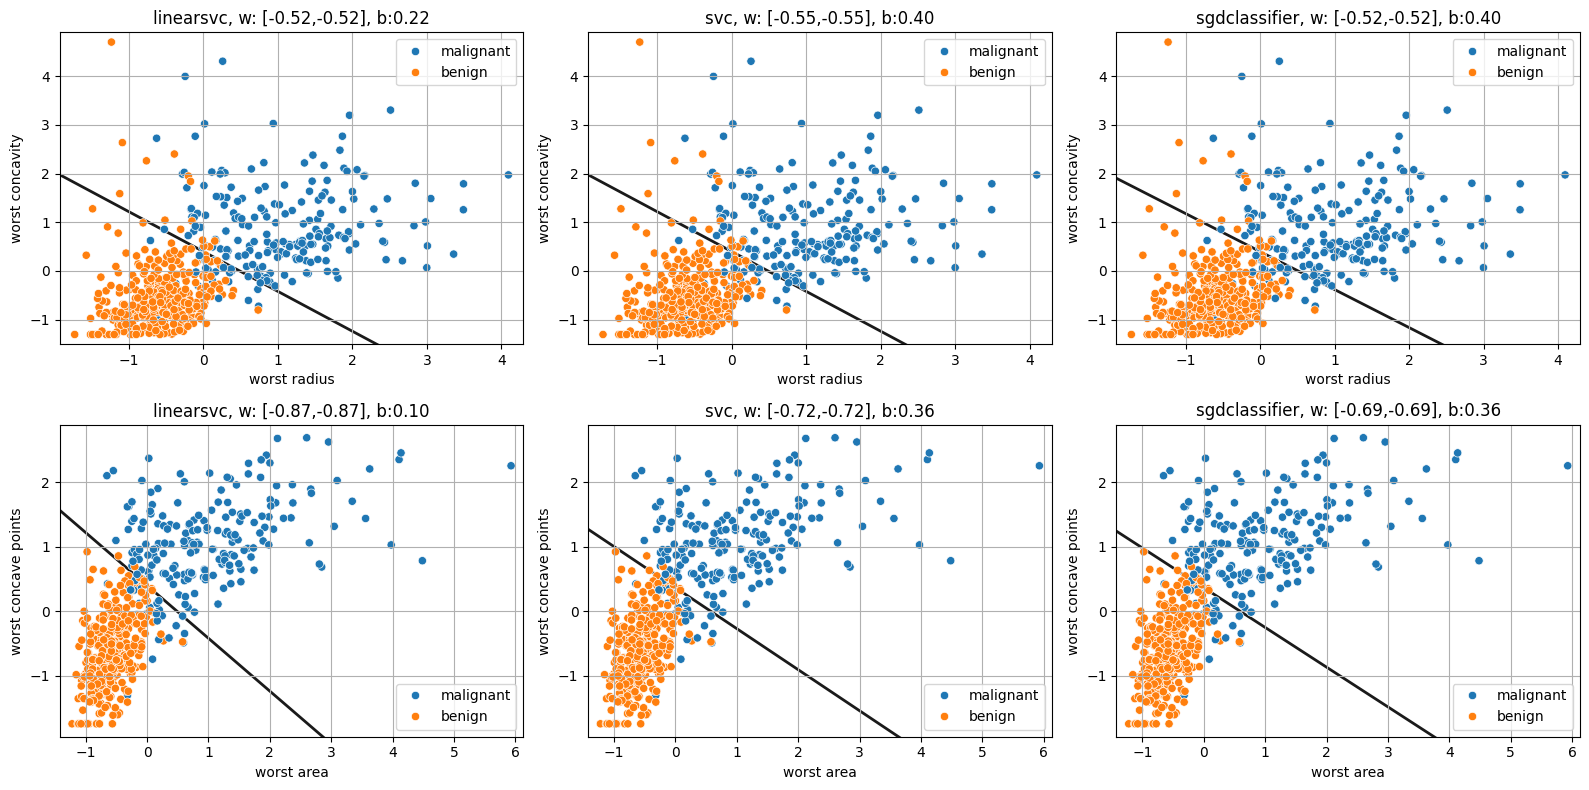

In [212]:
X1_scaled = StandardScaler().fit_transform(X1)
X2_scaled = StandardScaler().fit_transform(X2)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        if i == 0:
            plot_datapoints(X1_scaled, y, axes[i, j])
            plot_decision_boundary(X1_scaled, axes[i, j], clfs[i][j])
            decorate(axes[i, j], group=i+1)
        else:
            plot_datapoints(X2_scaled, y, axes[i, j])
            plot_decision_boundary(X2_scaled, axes[i, j], clfs[i][j])
            decorate(axes[i, j], group=i+1)

plt.tight_layout()
plt.show()